## Name: Depesh Sharma

### MINI_Project: BigMart

#### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also,<br> certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive<br>
model and find out the sales of each product at a particular store.<br>

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing<br> sales.<br>

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to<br> treat them accordingly.<br>

We will handle this problem in a structured way. We will be following the table of content given below.

1).Problem Statement<br>
2).Hypothesis Generation<br>
3).Loading Packages and Data<br>
4).Data Structure and Content<br>
5).Exploratory Data Analysis<br>
6).Univariate Analysis<br>
7).Bivariate Analysis<br>
8).Missing Value Treatment<br>
9).Feature Engineering<br>
10).Encoding Categorical Variables<br>
11).Label Encoding<br>
12).One Hot Encoding<br>
13).PreProcessing Data<br>
14).Modeling<br>
15).Linear Regression<br>
16).Regularized Linear Regression<br>
17).RandomForest<br>
18).XGBoost<br>
19).Summary<br>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")#allows you to handle all warnings with the standard logging infrastructure.

In [2]:
train = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/Technolabs/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/Technolabs/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Checking null values of train data

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Handling Null values

In [13]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
train.drop(['Outlet_Size'], axis = 1, inplace = True)

In [16]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Checking null values of test data

In [17]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

In [19]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
test.drop(['Outlet_Size'], axis = 1, inplace = True)

In [21]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Univariate Data Analysis

In [22]:
# Train data
cat_cols = [i for i in train.columns if train[i].dtypes=='object']
num_cols = [i for i in train.columns if train[i].dtypes!='object']
print(cat_cols)
print(num_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [23]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

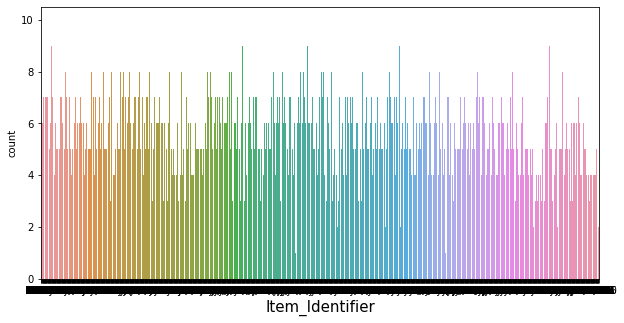

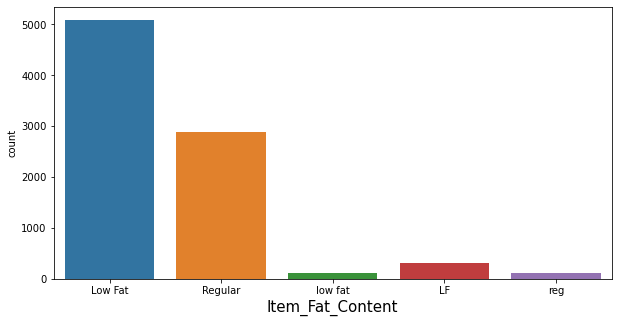

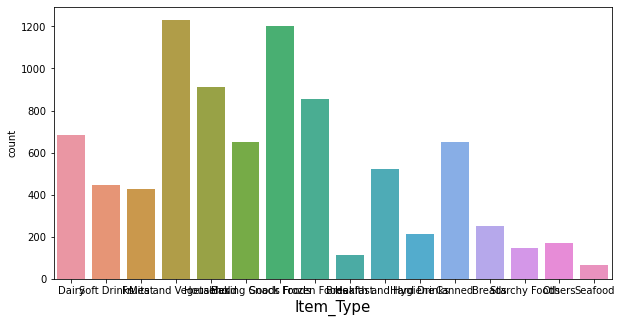

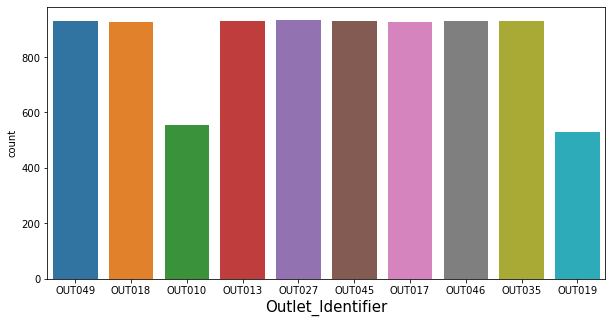

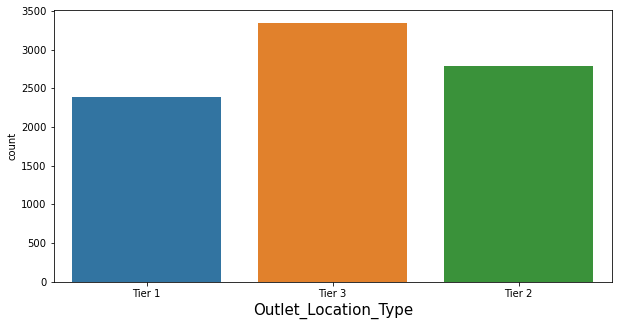

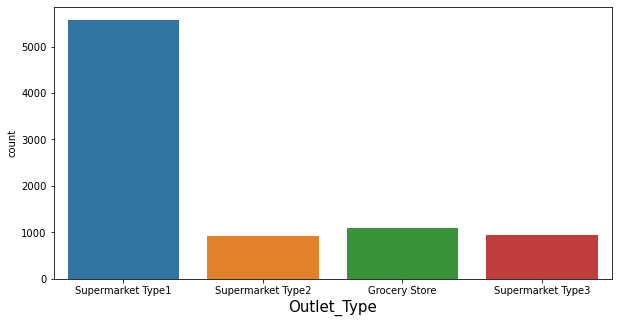

In [24]:
for i in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x = i, data = train)
    plt.xlabel(i, fontsize=15)
    plt.show()

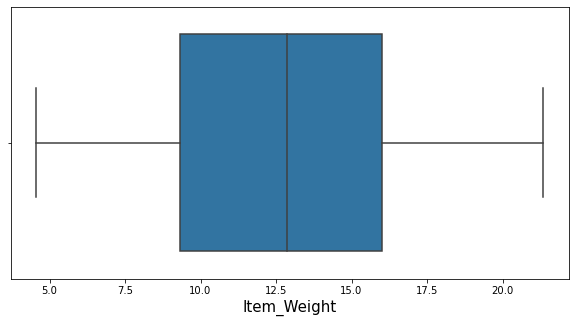

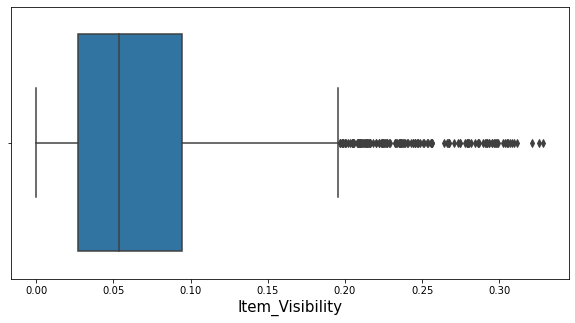

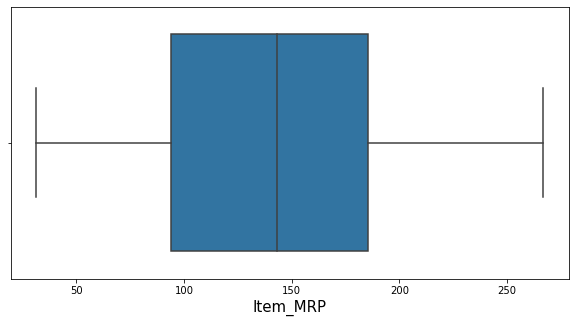

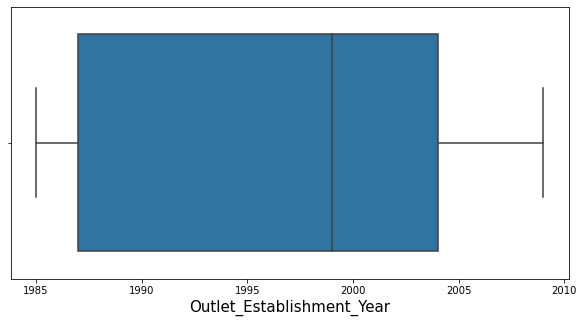

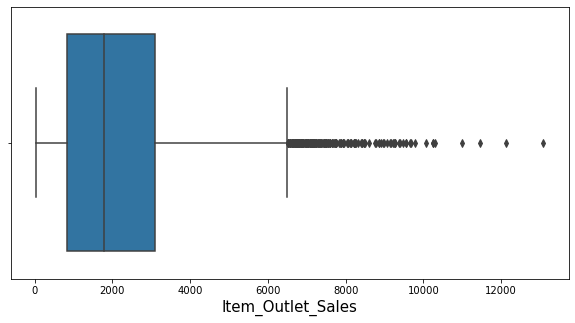

In [25]:
for i in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x = i, data = train)
    plt.xlabel(i, fontsize=15)
    plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

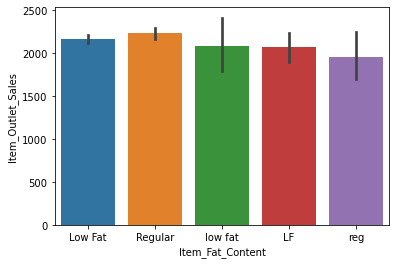

In [26]:
sns.barplot(x = train['Item_Fat_Content'],y = train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

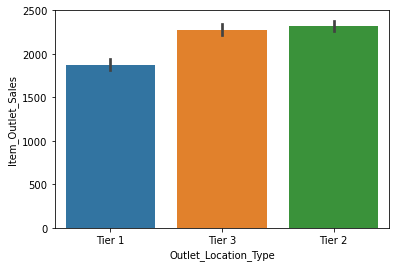

In [27]:
sns.barplot(x = train['Outlet_Location_Type'],y = train['Item_Outlet_Sales'])

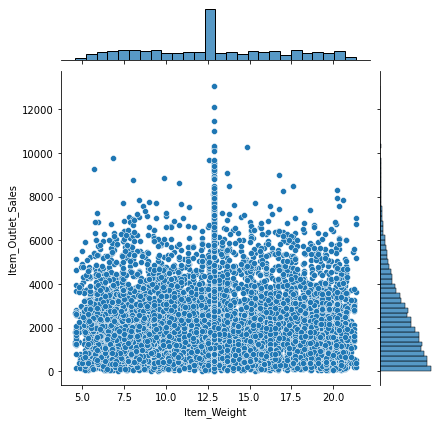

In [28]:
sns.jointplot(x = train['Item_Weight'],y = train['Item_Outlet_Sales'])

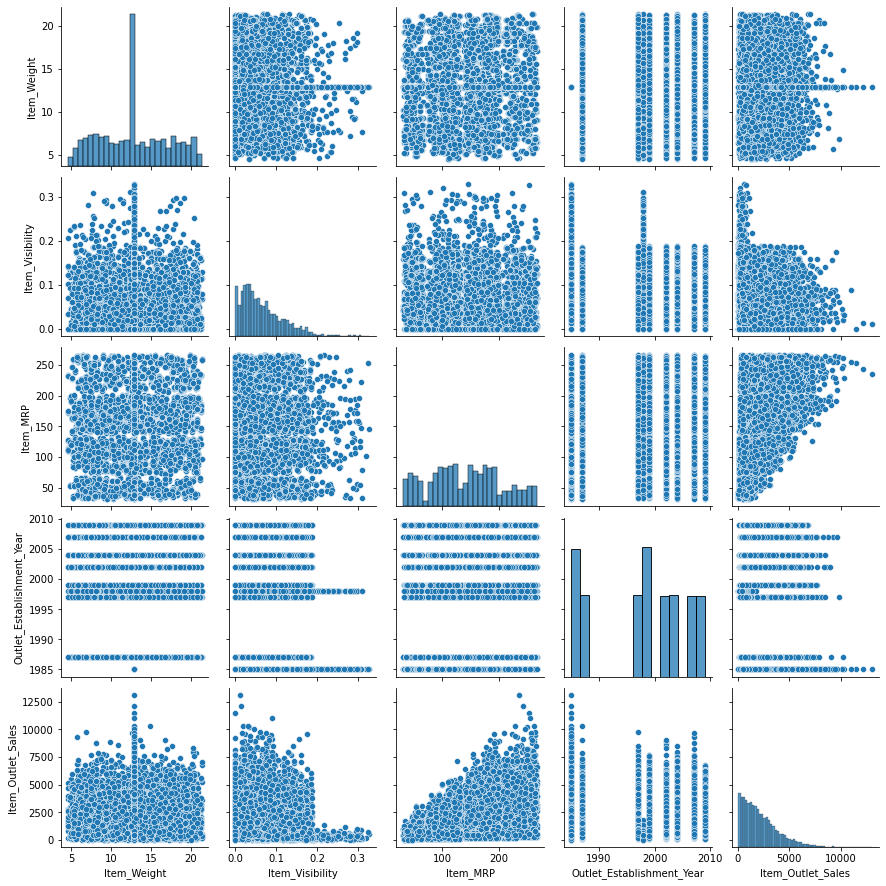

In [29]:
sns.pairplot(data = train)

## Multivariate Analysis

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

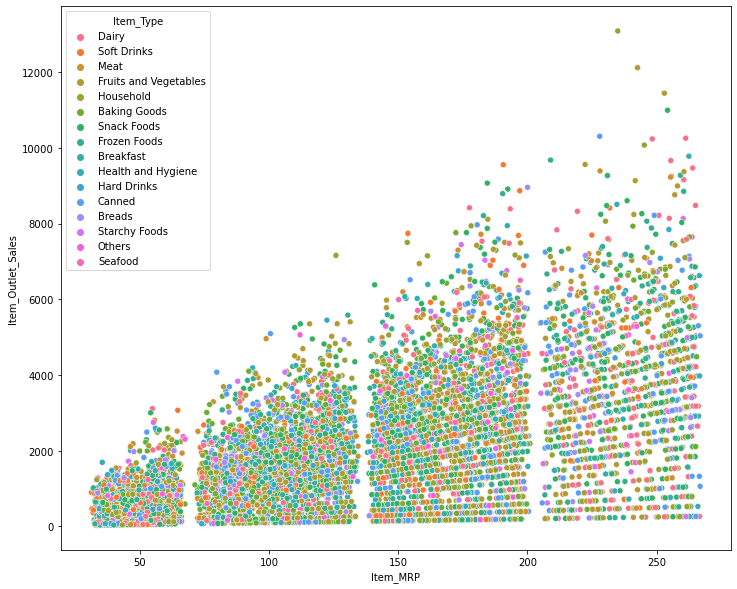

In [30]:
plt.figure(figsize=[12,10])
sns.scatterplot(x = train['Item_MRP'], y = train['Item_Outlet_Sales'], hue=train['Item_Type'])

### We observed a huge changes in Sales and Price of same item might be because of outlet Region wise Price

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

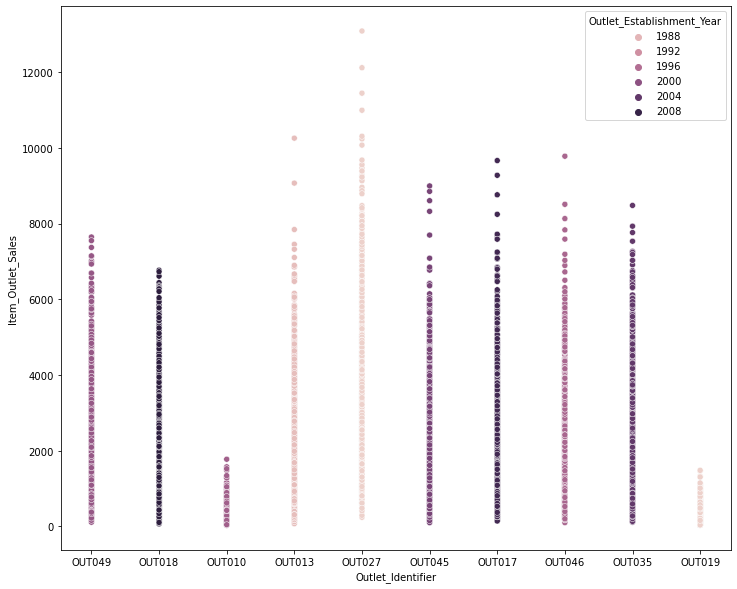

In [31]:
plt.figure(figsize=[12,10])

sns.scatterplot(x = train['Outlet_Identifier'], y = train['Item_Outlet_Sales'], hue=train['Outlet_Establishment_Year'])

### Maximum Sales is observed in the year 1987 of OUT027

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


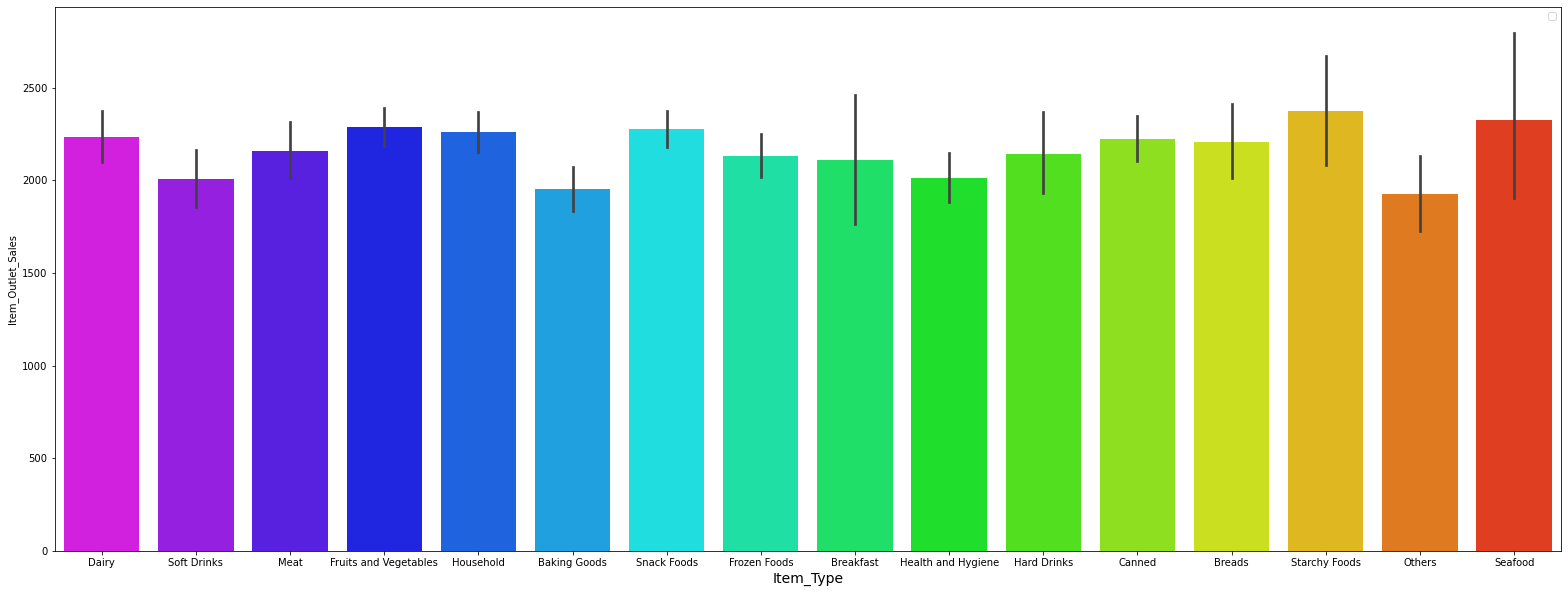

In [32]:
# Sales wrt item types
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


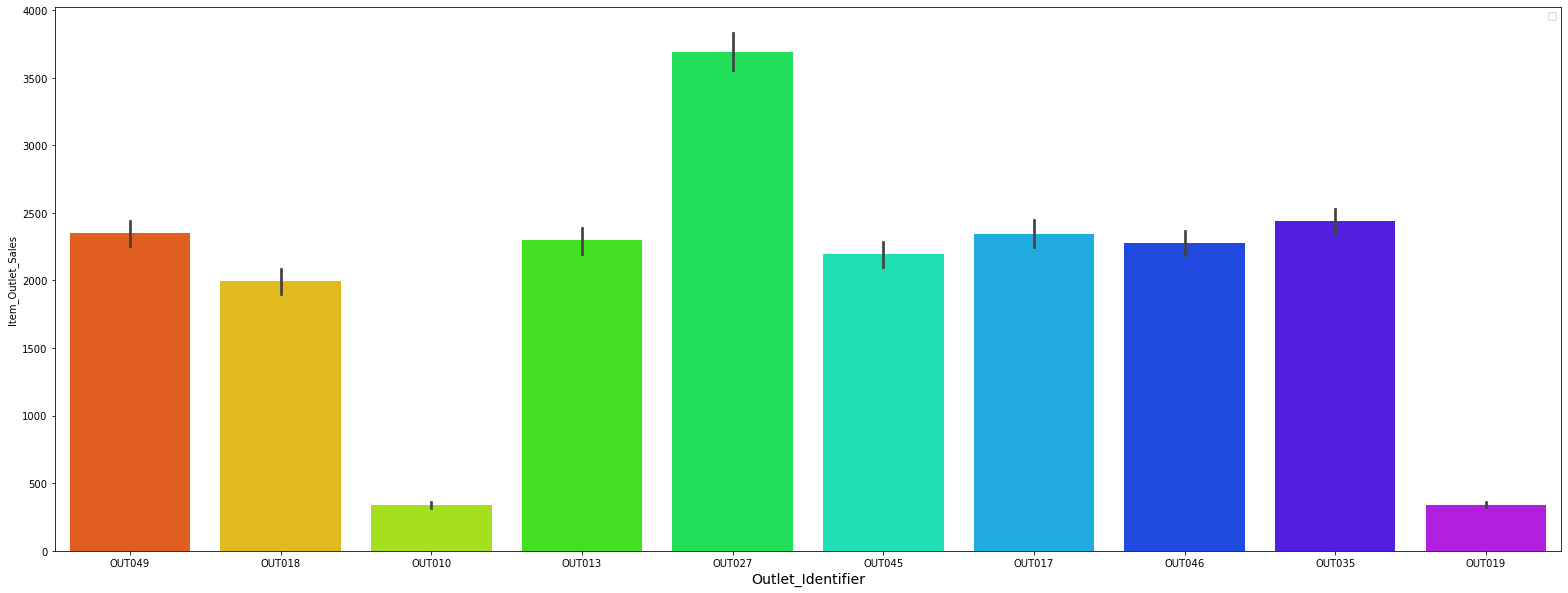

In [33]:
# sales wrt outlet stores

plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

### Correlation

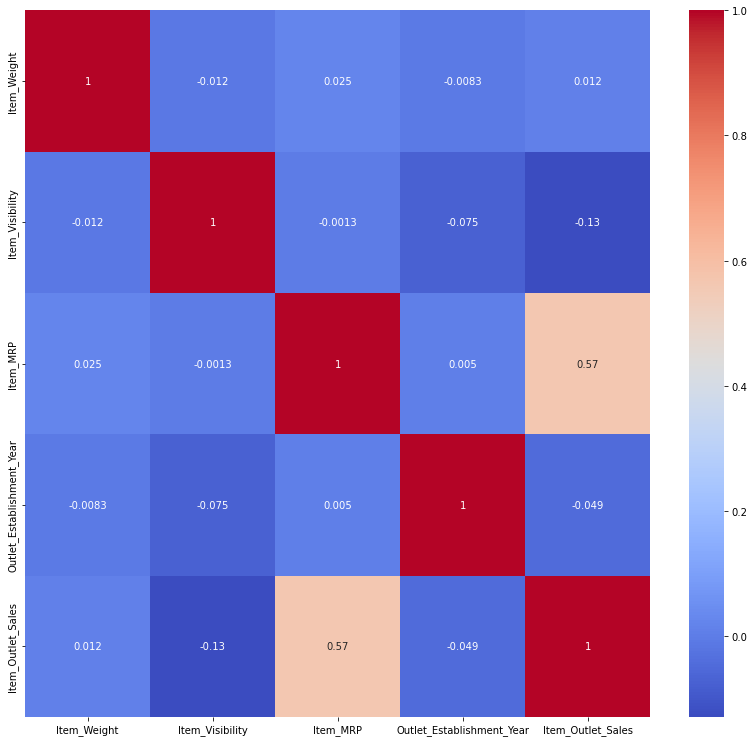

In [34]:
corr = train.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

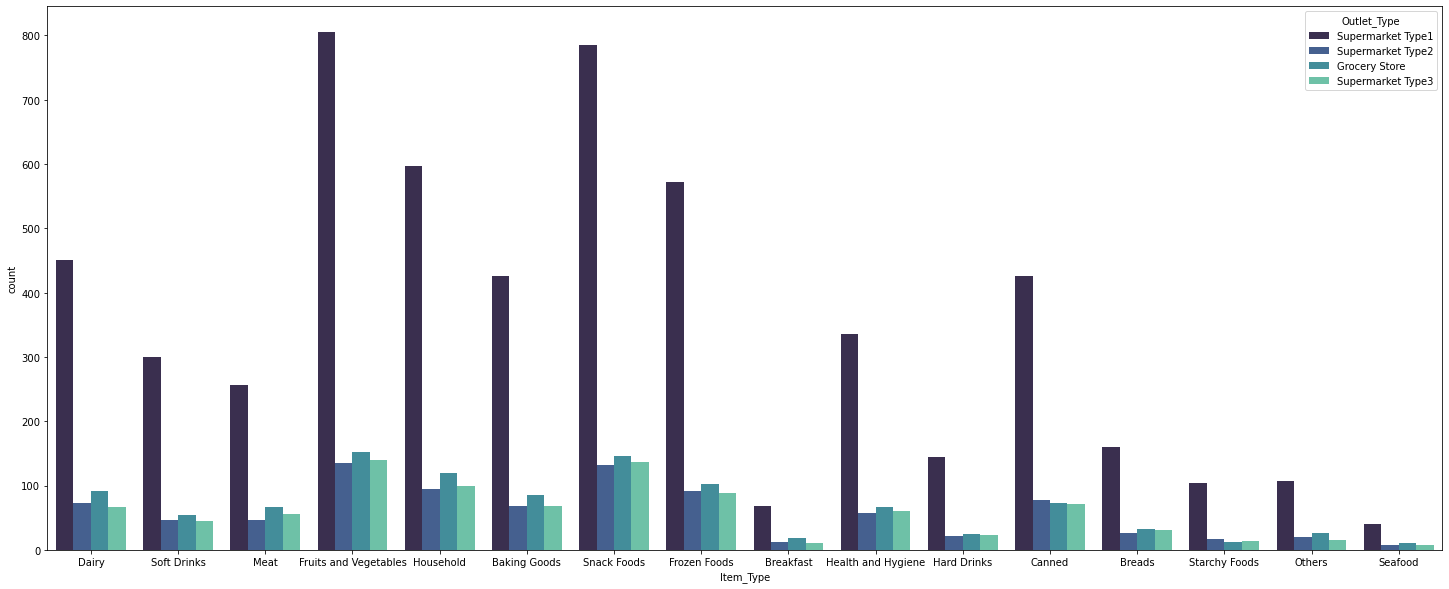

In [35]:
plt.figure(figsize=[25,10])
sns.countplot(x = "Item_Type", data=train, palette='mako', hue='Outlet_Type', orient='v')

### Feature Engineering

In [36]:
def cal_outlet_year(df):
    #Years:
    df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']
    print(df['Outlet_Years'].describe())

In [44]:
cal_outlet_year(train)
cal_outlet_year(test)

count    8523.000000
mean       24.168133
std         8.371760
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64
count    5681.000000
mean       24.171097
std         8.372256
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64


In [37]:
train.drop(columns="Outlet_Establishment_Year", inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Tier 3,Supermarket Type2,1845.5976


In [38]:
test.drop(columns="Outlet_Establishment_Year", inplace=True)
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,Tier 2,Supermarket Type1


In [39]:
new = train.groupby(["Item_Identifier","Item_Type"]).size()
new

Item_Identifier  Item_Type         
DRA12            Soft Drinks           6
DRA24            Soft Drinks           7
DRA59            Soft Drinks           8
DRB01            Soft Drinks           3
DRB13            Soft Drinks           5
                                      ..
NCZ30            Household             7
NCZ41            Health and Hygiene    5
NCZ42            Household             5
NCZ53            Health and Hygiene    5
NCZ54            Household             7
Length: 1559, dtype: int64

##### As we can observed the first two letters defines the item description

DR = Drinks<br>
FD = Food items<br>
NC = Non consumable household items

In [40]:
train.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [41]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2]) #Taking first two initials
train['Item_Type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 8523, dtype: object

In [42]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(train['Item_Type_Combined'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64


In [45]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Type_Combined, Length: 5681, dtype: object

In [46]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(test['Item_Type_Combined'].value_counts())

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64


In [47]:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(train['Item_Fat_Content'].value_counts())

Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64


In [48]:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(test['Item_Fat_Content'].value_counts())

Low Fat       2386
Regular       1935
Non-Edible    1087
LF             145
reg             78
low fat         50
Name: Item_Fat_Content, dtype: int64


##### Saving file

In [4]:
train.to_csv("dp_train.csv",index=False)
test.to_csv("dp_test.csv", index=False)

NameError: name 'train' is not defined

## Label Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
# reading train file
train1 = pd.read_csv('dp_train.csv')
# reading test file
test1 = pd.read_csv('dp_test.csv')

In [4]:
train1.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Item_Type_Combined       object
dtype: object

In [5]:
test1.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Location_Type     object
Outlet_Type              object
Item_Type_Combined       object
dtype: object

In [6]:
# Train data
cat_cols = [i for i in train1.columns if train1[i].dtypes=='object']
num_cols = [i for i in train1.columns if train1[i].dtypes!='object']
print(cat_cols)
print(num_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [7]:
# Test data
cat_cols = [i for i in test1.columns if test1[i].dtypes=='object']
num_cols = [i for i in test1.columns if test1[i].dtypes!='object']
print(cat_cols)
print(num_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']
['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [8]:
# Label encoding on train data
lb = LabelEncoder()
for i in cat_cols:
    train1[i] = lb.fit_transform(train1[i])

In [9]:
# label encoding on test data
lb = LabelEncoder()
for i in cat_cols:
    test1[i] = lb.fit_transform(test1[i])

In [10]:
train1.dtypes

Item_Identifier           int32
Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Identifier         int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
Item_Type_Combined        int32
dtype: object

In [11]:
test1.dtypes

Item_Identifier           int32
Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Identifier         int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Type_Combined        int32
dtype: object

In [12]:
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.30,1,0.016047,4,249.8092,9,0,1,3735.1380,1
1,8,5.92,3,0.019278,14,48.2692,3,2,2,443.4228,0
2,662,17.50,1,0.016760,10,141.6180,9,0,1,2097.2700,1
3,1121,19.20,3,0.000000,6,182.0950,0,2,0,732.3800,1
4,1297,8.93,2,0.000000,9,53.8614,1,2,1,994.7052,2


In [13]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,1103,20.750000,1,0.007565,13,107.8622,9,0,1,1
1,1067,8.300000,5,0.038428,4,87.3198,2,1,1,1
2,1406,14.600000,2,0.099575,11,241.7538,0,2,0,2
3,809,7.315000,1,0.015388,13,155.0340,2,1,1,1
4,1184,12.695633,3,0.118599,4,234.2300,5,2,3,1


### Defining x(independent variable) and y(dependent variable)

In [14]:
x = train1.drop(columns="Item_Outlet_Sales")
y = train1.Item_Outlet_Sales
print(x.shape)
print(y.shape)

(8523, 10)
(8523,)


In [15]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,156,9.30,1,0.016047,4,249.8092,9,0,1,1
1,8,5.92,3,0.019278,14,48.2692,3,2,2,0
2,662,17.50,1,0.016760,10,141.6180,9,0,1,1
3,1121,19.20,3,0.000000,6,182.0950,0,2,0,1
4,1297,8.93,2,0.000000,9,53.8614,1,2,1,2


In [16]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.15)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7244, 10)
(1279, 10)
(7244,)
(1279,)


## Model Building

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV,LassoCV

In [24]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [27]:
print("Training score", m1.score(x_train,y_train))
print("Test score", m1.score(x_test, y_test))

Training score 0.4961305118892454
Test score 0.5334238577023613


In [29]:
pred = m1.predict(x_test)
print("Predicted values: ",pred)

Predicted values:  [ 824.57936133  704.68560737  841.83340027 ... 2799.03389886 2722.40142712
 1183.10387725]


In [31]:
print('MAE',np.sqrt(mean_absolute_error(y_test,pred)))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

MAE 29.108582622955193
RMSE 1145.726986697508


### Cross Validation 

In [37]:
cv_score = cross_val_score(m1,x, y,cv=5)
print("cv_scores", cv_score)
print('cv_score.mean', cv_score.mean())

cv_scores [0.51541424 0.50548831 0.48125957 0.49819921 0.49863259]
cv_score.mean 0.499798784711292


### Lasso Regression

In [38]:
lassocv= LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True, random_state=42)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True, random_state=42)

In [39]:
lasso_reg = Lasso(alpha=lassocv.alpha_)
lasso_reg.fit(x_train,y_train)`

Lasso(alpha=0.056507918436916264)

In [40]:
print("Training score", lasso_reg.score(x_train,y_train))
print("Test score", lasso_reg.score(x_test, y_test))

Training score 0.4961300580267026
Test score 0.533431126021447


In [44]:
pred1 = lasso_reg.predict(x_test)
print("Predicted values: ",pred1)

Predicted values:  [ 823.8458957   704.96656046  841.4798483  ... 2801.63834183 2723.33571367
 1185.52546313]


In [45]:
print('MAE',np.sqrt(mean_absolute_error(y_test,pred1)))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred1)))

MAE 29.107916077796748
RMSE 1145.7180626002373


In [ ]:
``

### XGBoost Regression

In [46]:
m2 = XGBRegressor()

#### RandomizedSearchCV for Hyper-Parameter Tuning

In [47]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "learning_rate": [.03, 0.05, .07]   
}

In [49]:
random_search = RandomizedSearchCV(m2, param_distributions=params,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [50]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.03, 0.05, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

#### Best Params

In [51]:
random_search.best_score_

0.585846653443351

In [53]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.07,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [54]:
m2 =  XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)

In [56]:
m2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
print("Training score", m2.score(x_train,y_train))
print("Test score", m2.score(x_test, y_test))

Training score 0.586832117394483
Test score 0.5838529870153203


In [58]:
pred = m2.predict(x_test)
print("Predicted values: ",pred)

Predicted values:  [1428.0609  1005.33685 1001.3357  ... 2191.846   2614.8645   564.4754 ]


In [59]:
print('MAE',np.sqrt(mean_absolute_error(y_test,pred)))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

MAE 27.350344326012063
RMSE 1082.0398849152068


#### Cross Validation of model

In [60]:
cv_score = cross_val_score(m2,x, y,cv=10)
print("cv_scores", cv_score)
print('cv_score.mean', cv_score.mean())

cv_scores [0.55391912 0.57176469 0.53960113 0.57602688 0.54227827 0.56654895
 0.57888738 0.55695695 0.58973714 0.55476836]
cv_score.mean 0.5630488877689286


In [66]:
model_XGB2 = XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)
model_XGB2.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
model_XGB2.score(x,y)

0.5893994941509404

In [69]:
cv_score = cross_val_score(model_XGB2,x, y,cv=10)
print("cv_scores", cv_score)
print('cv_score.mean', cv_score.mean())

cv_scores [0.55391912 0.57176469 0.53960113 0.57602688 0.54227827 0.56654895
 0.57888738 0.55695695 0.58973714 0.55476836]
cv_score.mean 0.5630488877689286


#### Gradient Boosting

In [70]:
m_GBR = GradientBoostingRegressor()

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": [.03, 0.05, .07,0.5,1],
}

#### Using RandomizedSearchCV for Hyper-Parameter Tuning

In [71]:
search_cv = RandomizedSearchCV(m_GBR, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2)

In [72]:
search_cv.fit(x_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=20, n_jobs=2,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.07, 0.5,
                                                          1],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [73]:
search_cv.best_params_

{'n_estimators': 200, 'max_leaf_nodes': 5, 'learning_rate': 0.07}

In [74]:
m_GBR = GradientBoostingRegressor(n_estimators=200,max_leaf_nodes=5,learning_rate=0.07)
m_GBR.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.07, max_leaf_nodes=5,
                          n_estimators=200)

In [75]:
print("Training score", m_GBR.score(x_train,y_train))
print("Test score", m_GBR.score(x_test, y_test))

Training score 0.6271782643172641
Test score 0.6080841364470307


In [76]:
pred = m_GBR.predict(x_test)
print("Predicted values: ",pred)

Predicted values:  [1313.55238689  696.71525642  707.02073111 ... 2260.38538049 2889.72728566
  344.56760616]


In [77]:
print('MAE',np.sqrt(mean_absolute_error(y_test,pred)))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

MAE 26.954782030579715
RMSE 1050.0652826865842


In [78]:
cv_score = cross_val_score(m_GBR,x, y,cv=10)
print("cv_scores", cv_score)
print('cv_score.mean', cv_score.mean())

cv_scores [0.5943742  0.6163016  0.56549586 0.604178   0.5340142  0.60359527
 0.61210653 0.58733079 0.62633094 0.576309  ]
cv_score.mean 0.5920036376526424


## It is observed that XGBoost Regression gives best fit as per Train, Test score and MAE.